In [7]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB


In [8]:
def loadData(path):
    data=pd.read_csv(path)
    df = data[["gender","Stress"]]
    X_train = df.to_numpy()
    Y_train = []
    for n in data[["number"]].to_numpy():
        if "control" in n[0]:
            Y_train.append(0)
        elif "condition" in n[0]:
            Y_train.append(1)
    Y_train = np.asarray(Y_train) 
    return X_train,Y_train


In [9]:
set = 1
X_train,Y_train = loadData(f"fold/{set}/train.csv")
X_val,Y_val = loadData(f"fold/{set}/val.csv")
X_test,Y_test = loadData(f"fold/test.csv")

svm_al = svm.SVC(probability=True)
tree_al = tree.DecisionTreeClassifier()
extra_tree = BaggingClassifier(ExtraTreeClassifier(random_state=0), random_state=0)
knn_al = KNeighborsClassifier(n_neighbors=3)
forest = RandomForestClassifier(max_depth=2, random_state=0)
naive = GaussianNB()

C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2728173698.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2728173698.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2728173698.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2728173698.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2728173698.py:18: DeprecationWarning: scipy.interp is dep

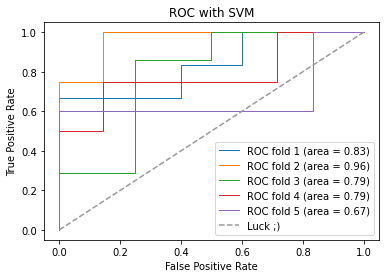

In [30]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy import interp
import pylab as pl

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    svm_al.fit(X_train,Y_train)
    predicted_probas = svm_al.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with SVM')
pl.legend(loc="lower right")
pl.show()



C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2069791892.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2069791892.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2069791892.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2069791892.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2069791892.py:18: DeprecationWarning: scipy.interp is dep

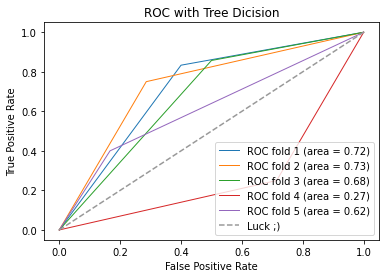

In [32]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy import interp
import pylab as pl

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    tree_al.fit(X_train,Y_train)
    predicted_probas = tree_al.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with Tree Dicision')
pl.legend(loc="lower right")
pl.show()
    
    

C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2434032749.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2434032749.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2434032749.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2434032749.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\2434032749.py:18: DeprecationWarning: scipy.interp is dep

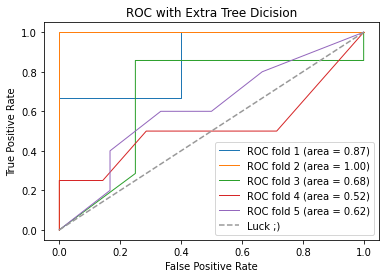

In [33]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy import interp
import pylab as pl

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    extra_tree.fit(X_train,Y_train)
    predicted_probas = extra_tree.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with Extra Tree Dicision')
pl.legend(loc="lower right")
pl.show()
    

C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\720834121.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\720834121.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\720834121.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\720834121.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\720834121.py:18: DeprecationWarning: scipy.interp is deprecat

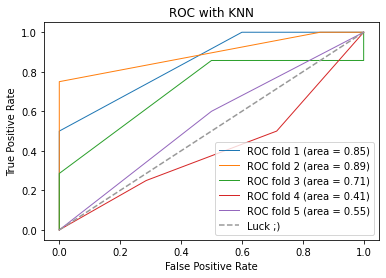

In [35]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy import interp
import pylab as pl

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    knn_al.fit(X_train,Y_train)
    predicted_probas = knn_al.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with KNN')
pl.legend(loc="lower right")
pl.show()

C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\3024171579.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\3024171579.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\3024171579.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\3024171579.py:18: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\3024171579.py:18: DeprecationWarning: scipy.interp is dep

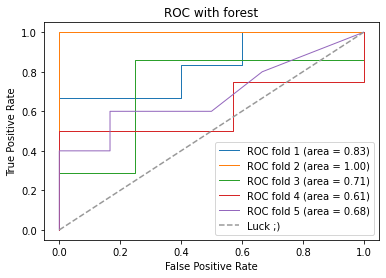

In [38]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy import interp
import pylab as pl

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    forest.fit(X_train,Y_train)
    predicted_probas = forest.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with forest')
pl.legend(loc="lower right")
pl.show()

C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\1357950466.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\1357950466.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\1357950466.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\1357950466.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Fille's PC\AppData\Local\Temp\ipykernel_61308\1357950466.py:13: DeprecationWarning: scipy.interp is dep

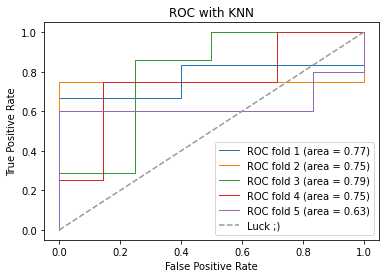

In [39]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


for i in range(1,6):
    X_train,Y_train = loadData(f"fold/{i}/train.csv")
    X_val,Y_val = loadData(f"fold/{i}/val.csv")
    X_test,Y_test = loadData(f"fold/test.csv")
    naive.fit(X_train,Y_train)
    predicted_probas = naive.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(Y_val, predicted_probas [:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck ;)')


pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC with KNN')
pl.legend(loc="lower right")
pl.show()